In [1]:
%pylab inline
import pyatomdb as pa
import pickle as pck
from astropy import constants as co
from astropy import units as un

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open("timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("enuclist.pkl","r") as f:
    enuclist = pck.load(f)
with open("ener_py.pkl","r") as f:
    ener = pck.load(f)
with open("ener2_py.pkl","r") as f:
    ener2 = pck.load(f)

In [5]:
print(enuclist[0], enuclist[1])
print(ener[0],ener[1])

(0.0, -274.76490418312335)
(274.76455010973172, 274.76454842299967)


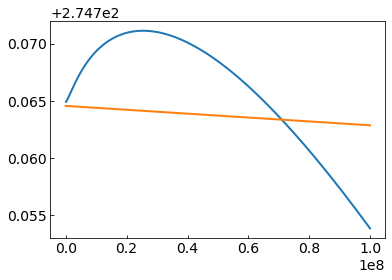

In [8]:
plot(timelist[1:],-enuclist[1:])
plot(timelist,ener)

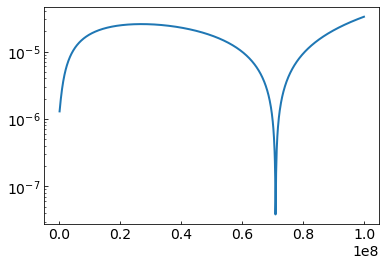

In [10]:
plot(timelist[1:],abs(ener[1:]+enuclist[1:])/ener[1:])
yscale("log")

In [68]:
with open("./longer/timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("./longer/tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("./longer/nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("./longer/eradlist.pkl","r") as f:
    eradlist = pck.load(f)
with open("./longer/eintlist.pkl","r") as f:
    eintlist = pck.load(f)

In [56]:
nnlist = nlist/1.67e-23
print(nnlist)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [57]:
powerdata = loadtxt("Power_atomdb_3.0.8.dat", skiprows=1)

In [58]:
elements=["He","C", "N", "O", "Ne", "Mg", "Si", "S", "Ar", "Ca", "Fe", "Ni"]
zlist=[2,6,7,8,10,12,14,16,18,20,26,28]

mlist=[4.00260200000000,12.0110000000000,14.0067400000000,15.9994000000000,20.1797000000000,24.3050000000000,28.0855000000000, \
       32.0680000000000,39.9480000000000,40.0780000000000,55.8470000000000,58.6934000000000]
print(size(mlist))

abunlist=[0.085,3.31e-4,9.12e-5,6.61e-4,8.32e-5,1.9e-6,2.63e-5,3.31e-5,2.45e-6,1.58e-5,6.31e-6,1.99e-6]
print(size(abunlist))
elements=array(elements)
zlist=array(zlist)
mlist=array(mlist)
abunlist=array(abunlist)

mabar_h = 0.904347600946928
mabar_e = 5.446170220743115e-4

#mflist=mlist*abunlist/((mlist*abunlist).sum()+0.904+5.45e-4*1.2)
mflist=mlist*abunlist/((mlist*abunlist).sum()+mabar_h+mabar_e*1.213)
print(mflist)

tem_plist = linspace(4,9,51)
print(tem_plist)

12
12
[  2.68783049e-01   3.14085367e-03   1.00918886e-03   8.35498546e-03
   1.32641240e-03   3.64829349e-05   5.83550507e-04   8.38572104e-04
   7.73217488e-05   5.00269090e-04   2.78400333e-04   9.22747521e-05]
[ 4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4
  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9. ]


In [179]:
print(mabar_e*1.213/((mlist*abunlist).sum()+mabar_h+mabar_e*1.213))

0.000521906318159


In [59]:
%%capture
ener=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*1.e10)
            frac_p[ii][kk,:] = frac_array
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener[kk] += s
        

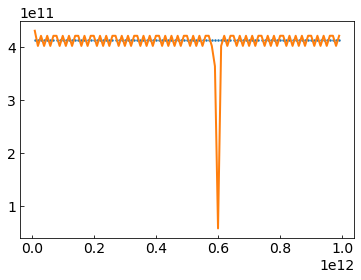

In [69]:
plot(timelist[1:], ener[1:]*1.e10,".")
plot(timelist[1:], -eintlist[1:]+eintlist[:-1])
#yscale("log")
#xlim((0.1e12,1.e12))
#ylim((3.e11,0.6e12))

[  2.07861813e+16   2.07857509e+16   2.07853491e+16]


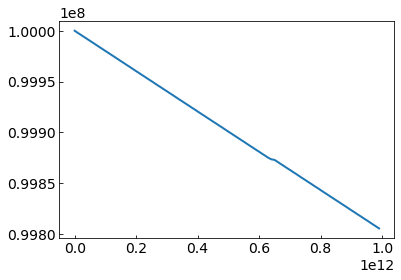

In [61]:
plot(timelist[:], tlist)
print(eintlist[0:3])

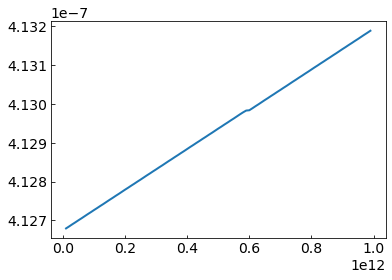

In [70]:
plot(timelist[1:],-eradlist[1:]/tlist[1:])

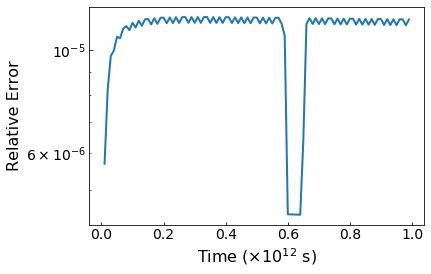

In [77]:
plot(timelist[1:]/1.e12, abs(ener[:-1]+eradlist[1:])/(-eradlist[1:]))
yscale("log")
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel("Relative Error")
savefig("err_1e8.pdf")

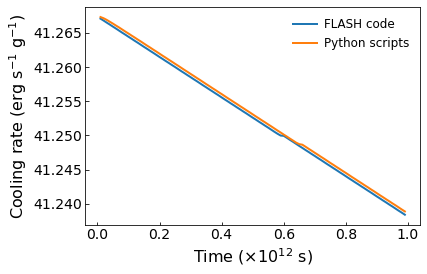

In [81]:
plot(timelist[1:]/1.e12, -eradlist[1:],label="FLASH code")
plot(timelist[1:]/1.e12, ener[:-1], label="Python scripts")
legend()
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel(r"Cooling rate (erg s$^{-1}$ g$^{-1}$)")
savefig("cool_1e8.pdf")

In [52]:
kk=0
ener[kk] = 0.
for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            #frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*1.e10)
            frac_p[ii][kk,:] = frac_array
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            print(ii, jj, nlist[kk]*0.000521906318159*co.N_A.value/mabar_e, \
                  nlist[kk] * mflist[ii]* frac_array[jj]*co.N_A.value/mlist[ii],10**pwindex_t, s)
            ener[kk] += s
        

(0, 0, 9.6375961491898536, 1.0979509600223733e-08, 4.736821289481004e-20, 0.00030013883705121749)
(0, 1, 9.6375961491898536, 6.9528103048888798e-08, 2.0048089848046348e-19, 0.0080442513719527521)
(0, 2, 9.6375961491898536, 0.67534672302163379, 6.855718864908653e-23, 26.719729028810526)
(1, 0, 9.6375961491898536, 0.0, 1.749540498428115e-19, 0.0)
(1, 1, 9.6375961491898536, 0.0, 5.714588988398831e-19, 0.0)
(1, 2, 9.6375961491898536, 0.0, 6.046527048728836e-19, 0.0)
(1, 3, 9.6375961491898536, 0.0, 3.35183784349219e-19, 0.0)
(1, 4, 9.6375961491898536, 1.6513554293990633e-11, 2.131493438150102e-19, 2.031312828850725e-06)
(1, 5, 9.6375961491898536, 1.9426644462708554e-07, 1.22488974876415e-19, 0.013732418956309361)
(1, 6, 9.6375961491898536, 0.0026296856884696785, 7.386896261284576e-22, 1.1210322212478374)
(2, 0, 9.6375961491898536, 7.9029142371587532e-12, 3.522645983984143e-19, 1.606602807832595e-06)
(2, 1, 9.6375961491898536, 0.0, 6.295163293798362e-19, 0.0)
(2, 2, 9.6375961491898536, 0.0, 

(10, 0, 9.6375961491898536, 9.8447509185052354e-14, 7.361460735624306e-22, 4.1823558866786572e-11)
(10, 1, 9.6375961491898536, 0.0, 5.565177235899387e-19, 0.0)
(10, 2, 9.6375961491898536, 0.0, 2.756227109462645e-19, 0.0)
(10, 3, 9.6375961491898536, 0.0, 5.672819954144099e-19, 0.0)
(10, 4, 9.6375961491898536, 0.0, 1.356634945982375e-18, 0.0)
(10, 5, 9.6375961491898536, 0.0, 1.902273684303633e-18, 0.0)
(10, 6, 9.6375961491898536, 0.0, 2.0380273130598922e-18, 0.0)
(10, 7, 9.6375961491898536, 0.0, 2.230904605240893e-18, 0.0)
(10, 8, 9.6375961491898536, 0.0, 1.9501903360058922e-18, 0.0)
(10, 9, 9.6375961491898536, 0.0, 1.138492043924182e-18, 0.0)
(10, 10, 9.6375961491898536, 0.0, 1.409551668532678e-18, 0.0)
(10, 11, 9.6375961491898536, 0.0, 1.3173494668120987e-18, 0.0)
(10, 12, 9.6375961491898536, 0.0, 8.156953752618512e-19, 0.0)
(10, 13, 9.6375961491898536, 0.0, 9.540870475184094e-19, 0.0)
(10, 14, 9.6375961491898536, 0.0, 8.835863538776817e-19, 0.0)
(10, 15, 9.6375961491898536, 0.0, 1.165

In [54]:
print(mflist[1], mlist[1])

(0.0031408536681181683, 12.010999999999999)


In [50]:
print(ener[0])

41.2673036856


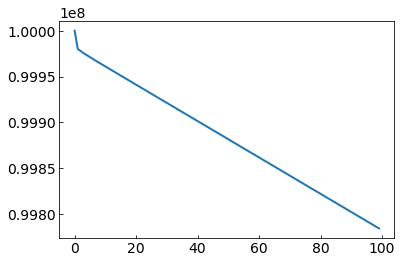

In [32]:
plot(tlist)

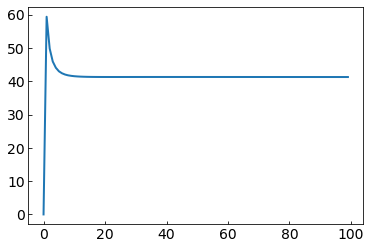

In [35]:
plot(-eradlist[0:])

In [37]:
print(eradlist[:2])

[  0.         -59.35525218]


In [82]:
with open("./e7/timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("./e7/tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("./e7/nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("./e7/eradlist.pkl","r") as f:
    eradlist = pck.load(f)
with open("./e7/eintlist.pkl","r") as f:
    eintlist = pck.load(f)

In [83]:
%%capture
ener2=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*1.e10)
            frac_p[ii][kk,:] = frac_array
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener2[kk] += s

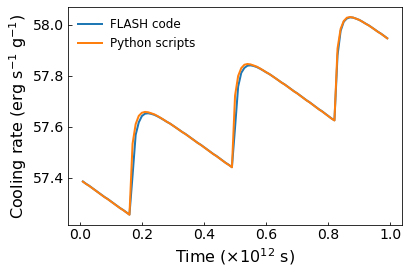

In [92]:
plot(timelist[1:]/1.e12, -eradlist[1:],label="FLASH code")
plot(timelist[1:]/1.e12, ener2[1:], label="Python scripts")
legend()
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel(r"Cooling rate (erg s$^{-1}$ g$^{-1}$)")
savefig("rate_1e7.pdf")

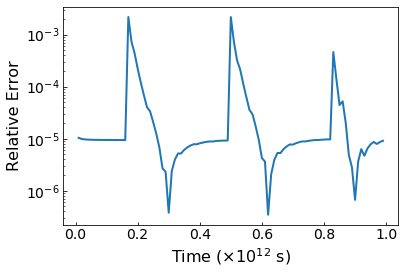

In [91]:
plot(timelist[1:]/1.e12, abs(ener2[1:]+eradlist[1:])/(-eradlist[1:]))
yscale("log")
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel("Relative Error")
savefig("err_1e7.pdf")

In [93]:
print(mflist)

[  2.68783049e-01   3.14085367e-03   1.00918886e-03   8.35498546e-03
   1.32641240e-03   3.64829349e-05   5.83550507e-04   8.38572104e-04
   7.73217488e-05   5.00269090e-04   2.78400333e-04   9.22747521e-05]


In [99]:
print(pa.apec.solve_ionbal_eigen(2, 1.e4))

[  1.00000000e+00   1.53941981e-09   0.00000000e+00]


In [100]:
with open("./e6/timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("./e6/tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("./e6/nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("./e6/eradlist.pkl","r") as f:
    eradlist = pck.load(f)
with open("./e6/eintlist.pkl","r") as f:
    eintlist = pck.load(f)

In [115]:
%%capture
ener3=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*0.5e10)
            try:
               # t_tmp = 0.5*(tlist[kk]+tlist[kk+1])
                t_tmp = tlist[kk+1]
            except:
                t_tmp = tlist[kk]
                
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], t_tmp, init_pop=frac_array, \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*0.5e10)
            frac_p[ii][kk,:] = frac_array
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener3[kk] += s

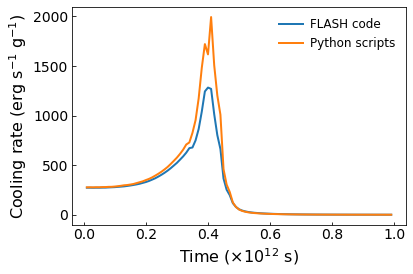

In [116]:
plot(timelist[1:]/1.e12, -eradlist[1:],label="FLASH code")
plot(timelist[1:]/1.e12, ener3[1:], label="Python scripts")
legend()
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel(r"Cooling rate (erg s$^{-1}$ g$^{-1}$)")
#savefig("e6.pdf")

In [108]:
print(eradlist.min())

-1283.01770807


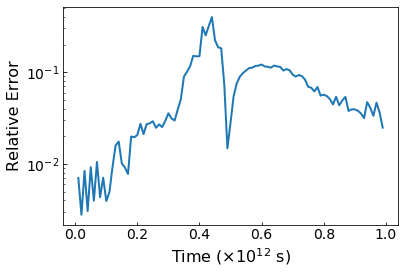

In [106]:
plot(timelist[1:]/1.e12, abs(ener3[1:]+eradlist[1:])/(-eradlist[1:]))
yscale("log")
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel("Relative Error")
savefig("err_e6.pdf")

In [170]:
with open("./stepbystep/timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("./stepbystep/tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("./stepbystep/nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("./stepbystep/eradlist.pkl","r") as f:
    eradlist = pck.load(f)
with open("./stepbystep/eintlist.pkl","r") as f:
    eintlist = pck.load(f)

In [171]:
dtlist=timelist[1:]-timelist[:-1]

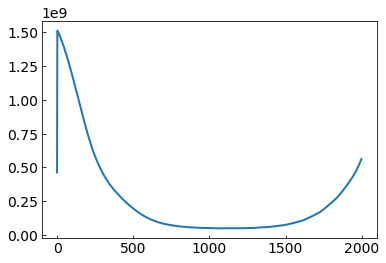

In [172]:
plot(dtlist)

In [173]:
ttlist = tlist
tlist = 0.5*(tlist[1:]+tlist[:-1])

In [174]:
%%capture
ener4=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size-1):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            #frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*dtlist[kk-1])
            
            frac_p[ii][kk,:] = frac_array
            #frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener4[kk] += s

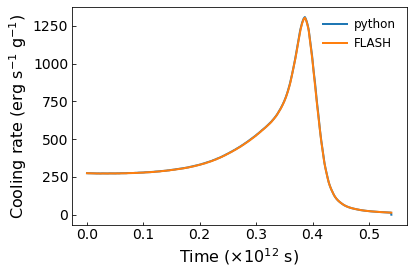

In [184]:
plot(timelist[1:]/1.e12,ener4[:], label="python")
plot(timelist[1:]/1.e12,-eradlist[1:], label="FLASH")
#yscale("log")
legend()
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel(r"Cooling rate (erg s$^{-1}$ g$^{-1}$)")
savefig("e6_mid_sm.pdf")

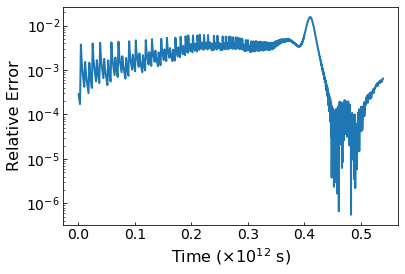

In [183]:
plot(timelist[1:-1]/1.e12,abs(ener4[:-1]+eradlist[1:-1])/(-eradlist[1:-1]))
yscale("log")
xlabel(r"Time ($\times 10^{12}$ s)")
ylabel("Relative Error")
savefig("err_e6_sm.pdf")

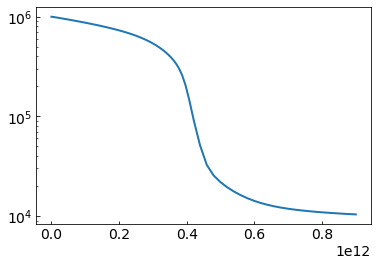

In [167]:
plot(timelist[1:], tlist)
yscale("log")

In [180]:
print(mflist)
print(mlist)

[  2.68783049e-01   3.14085367e-03   1.00918886e-03   8.35498546e-03
   1.32641240e-03   3.64829349e-05   5.83550507e-04   8.38572104e-04
   7.73217488e-05   5.00269090e-04   2.78400333e-04   9.22747521e-05]
[  4.002602  12.011     14.00674   15.9994    20.1797    24.305     28.0855
  32.068     39.948     40.078     55.847     58.6934  ]


In [181]:
print(eintlist)

[  2.07861813e+14   2.07734496e+14   2.07480050e+14 ...,   3.84019923e+12
   3.83255941e+12   3.82493495e+12]


In [182]:
zlist

array([ 2,  6,  7,  8, 10, 12, 14, 16, 18, 20, 26, 28])